In [1]:
import numpy as np

# Grid World dimensions
n_rows = 5
n_cols = 5

goal_state = (n_rows-1, n_cols-1)
obstacles = [(1, 1), (3,1)]

# reward function
def reward(s):
    if s == goal_state:
        return 1
    elif s in obstacles:
        return -1
    return 0

actions = ['up', 'down', 'left', 'right']

states = [(i, j) for i in range(n_rows) for j in range(n_cols)]

# Transition function
def transition(s, a):
    i, j = s
    if a == 'up':
        if i > 0 and (i - 1, j) not in obstacles:  # valid move up
            return (i - 1, j)
        else:  # if it's off the grid or an obstacle
            return (i, j)
    
    elif a == 'down':
        if i < n_rows - 1 and (i + 1, j) not in obstacles:  # valid move down
            return (i + 1, j)
        else:  # if it's off the grid or an obstacle
            return (i, j)
    
    elif a == 'left':
        if j > 0 and (i, j - 1) not in obstacles:  # valid move left
            return (i, j - 1)
        else:  # if it's off the grid or an obstacle
            return (i, j)
    
    elif a == 'right':
        if j < n_cols - 1 and (i, j + 1) not in obstacles:  # valid move right
            return (i, j + 1)
        else:  # if it's off the grid or an obstacle
            return (i, j)

# value function init for all states
V = {s: 0 for s in states}

# Value iteration
def value_iteration(gamma=0.9, threshold=1e-10):
    delta = float('inf')
    while delta > threshold:
        delta = 0
        for s in states:
            if s == goal_state or s in obstacles:
                continue  # terminal states
            # Compute the value for each action in the current state
            v = V[s]
            action_values = []
            for a in actions:
                next_state = transition(s, a)
                action_values.append(reward(next_state) + gamma * V[next_state])
            # Update the value function using the maximum expected value
            V[s] = max(action_values)
            delta = max(delta, abs(v - V[s]))
    return V

# Extract the optimal policy
def extract_policy(V, gamma=0.9):
    policy = {}
    for s in states:
        if s == goal_state or s in obstacles:
            policy[s] = None 
        else:
            action_values = []
            for a in actions:
                next_state = transition(s, a)
                action_values.append(reward(next_state) + gamma * V[next_state])
            best_action = actions[np.argmax(action_values)]
            policy[s] = best_action
    return policy

optimal_state_values = value_iteration()
optimal_policy = extract_policy(optimal_state_values)

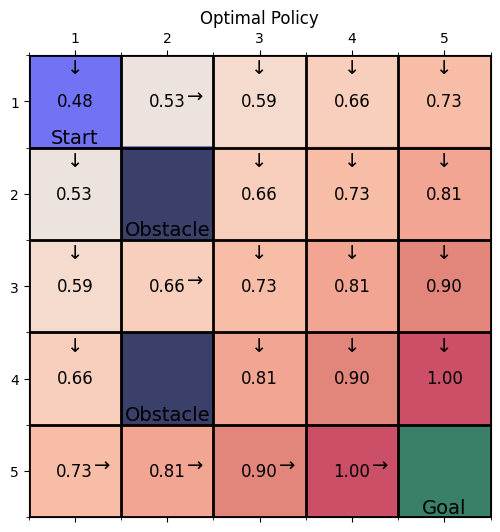

In [2]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(6, 6))
start_state = (0, 0)
value_grid = np.array([[optimal_state_values[(i, j)] for j in range(n_cols)] for i in range(n_rows)])
cax = ax.matshow(value_grid, cmap="coolwarm", alpha=0.7)
for i in range(n_rows):
    for j in range(n_cols):
        if (i, j) in obstacles or (i,j) == goal_state:
            continue
        ax.text(j, i, f'{optimal_state_values[(i, j)]:.2f}', ha='center', va='center', color='black', fontsize=12)
for (i, j), policy in optimal_policy.items():
    if policy:
        if policy == 'up':
            ax.annotate('↑', (j, i), textcoords="offset points", xytext=(0, -30), ha='center', color="black", fontsize=14)
        elif policy == 'down':
            ax.annotate('↓', (j, i), textcoords="offset points", xytext=(0, 20), ha='center', color="black", fontsize=14)
        elif policy == 'left':
            ax.annotate('←', (j, i), textcoords="offset points", xytext=(-20, 0), ha='center', color="black", fontsize=14)
        elif policy == 'right':
            ax.annotate('→', (j, i), textcoords="offset points", xytext=(20, 0), ha='center', color="black", fontsize=14)

# Mark obstacles
for (i, j) in obstacles:
    ax.add_patch(plt.Rectangle((j-0.5, i-0.5), 1, 1, fill=True, color='black', alpha=0.5))
    ax.annotate('Obstacle', (j, i), textcoords="offset points", xytext=(0, -30), ha='center', color="black", fontsize=14)

ax.add_patch(plt.Rectangle((goal_state[1]-0.5, goal_state[0]-0.5), 1, 1, fill=True, color='green', alpha=0.5))
ax.annotate('Goal', (goal_state[0], goal_state[1]), textcoords="offset points", xytext=(0, -30), ha='center', color="black", fontsize=14)
ax.add_patch(plt.Rectangle((start_state[1]-0.5, start_state[0]-0.5), 1, 1, fill=True, color='blue', alpha=0.5))
ax.annotate('Start', (start_state[0], start_state[1]), textcoords="offset points", xytext=(0, -30), ha='center', color="black", fontsize=14)
ax.set_xticks(np.arange(-0.5, n_cols, 1), minor=True)
ax.set_yticks(np.arange(-0.5, n_rows, 1), minor=True)
ax.grid(which='minor', color='k', linestyle='-', linewidth=2)
ax.set_xticks(np.arange(n_cols))
ax.set_yticks(np.arange(n_rows))
ax.set_xticklabels(np.arange(1, n_cols+1))
ax.set_yticklabels(np.arange(1, n_rows+1))
plt.title('Optimal Policy')
#plt.savefig("grid_world_value_function.png", bbox_inches='tight', dpi=300)
plt.show()
